In [1]:
import torch
import importlib
from torchvision import transforms
from IPython.display import display
import numpy as np


import dataset.dataset
import dataset.pair_generator
import util
import simclr
importlib.reload(dataset.dataset)
importlib.reload(dataset.pair_generator)
importlib.reload(util)
importlib.reload(simclr)

from dataset.dataset import UnlabeledDataset, LabeledDataset
from dataset.pair_generator import PairGenerator
from util import to_tensor_image, KNN
from simclr import SimCLR

/home/lspss95207/.local/share/virtualenvs/hw1-82sFHoS4/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Seed

In [2]:
torch.manual_seed(0)
np.random.seed(0)

### Load training dataset

In [3]:
from torchvision import datasets
n_views = 2
batch_size = 32
num_workers = 12                                                              

train_dataset = UnlabeledDataset(root="../data/unlabeled", transform=PairGenerator(size = 96,n_views=n_views))
# train_dataset = datasets.STL10("../data/stl10", split='unlabeled',
#                                                           transform=PairGenerator(n_views),
#                                                           download=True)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size = batch_size, shuffle = True,
    num_workers = num_workers, pin_memory = True, drop_last = True)


### Sample some training dataset image

Dataset size = 7294
Image 0
Transform 0


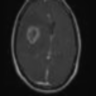

Transform 1


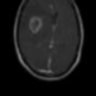

Image 1
Transform 0


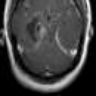

Transform 1


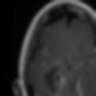

Image 2
Transform 0


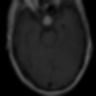

Transform 1


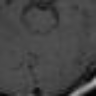

In [4]:
print("Dataset size =", len(train_dataset))

for i in range(3):
    print(f"Image {i}")
    for j, img in enumerate(train_dataset[i][0]):
        print(f"Transform {j}")
        display(to_tensor_image(img))

### Training

In [5]:
epochs = 300
lr = 0.0003
weight_decay = 1e-4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

simclr = SimCLR(out_dim=512, device=device, tensorboard_path="../runs")


In [6]:
simclr.train(train_loader=train_loader, batch_size=batch_size, n_views=n_views, lr=lr, weight_decay=weight_decay, epochs=epochs, save_path="../model")

100%|██████████| 227/227 [00:14<00:00, 15.46it/s]


Epoch: 0	Loss: 4.123189449310303	Top1 accuracy: 6.25


100%|██████████| 227/227 [00:15<00:00, 15.12it/s]


Epoch: 1	Loss: 3.986313819885254	Top1 accuracy: 7.8125


100%|██████████| 227/227 [00:12<00:00, 17.74it/s]


Epoch: 2	Loss: 3.7379026412963867	Top1 accuracy: 7.8125


100%|██████████| 227/227 [00:13<00:00, 16.97it/s]


Epoch: 3	Loss: 3.328094005584717	Top1 accuracy: 4.6875


100%|██████████| 227/227 [00:13<00:00, 16.27it/s]


Epoch: 4	Loss: 3.481820583343506	Top1 accuracy: 20.3125


100%|██████████| 227/227 [00:12<00:00, 18.08it/s]


Epoch: 5	Loss: 3.186352491378784	Top1 accuracy: 28.125


100%|██████████| 227/227 [00:12<00:00, 18.08it/s]


Epoch: 6	Loss: 3.290489912033081	Top1 accuracy: 18.75


100%|██████████| 227/227 [00:12<00:00, 18.09it/s]


Epoch: 7	Loss: 3.40287709236145	Top1 accuracy: 25.0


100%|██████████| 227/227 [00:12<00:00, 17.89it/s]


Epoch: 8	Loss: 3.0493199825286865	Top1 accuracy: 25.0


100%|██████████| 227/227 [00:12<00:00, 18.02it/s]


Epoch: 9	Loss: 3.0980911254882812	Top1 accuracy: 23.4375


100%|██████████| 227/227 [00:12<00:00, 18.48it/s]


Epoch: 10	Loss: 2.9644503593444824	Top1 accuracy: 29.6875


100%|██████████| 227/227 [00:12<00:00, 17.55it/s]


Epoch: 11	Loss: 2.9150500297546387	Top1 accuracy: 29.6875


100%|██████████| 227/227 [00:12<00:00, 18.29it/s]


Epoch: 12	Loss: 3.074450731277466	Top1 accuracy: 26.5625


100%|██████████| 227/227 [00:12<00:00, 17.84it/s]


Epoch: 13	Loss: 2.939868211746216	Top1 accuracy: 39.0625


100%|██████████| 227/227 [00:12<00:00, 17.79it/s]


Epoch: 14	Loss: 2.906351327896118	Top1 accuracy: 32.8125


100%|██████████| 227/227 [00:12<00:00, 18.50it/s]


Epoch: 15	Loss: 2.8155107498168945	Top1 accuracy: 37.5


100%|██████████| 227/227 [00:12<00:00, 17.54it/s]


Epoch: 16	Loss: 3.0045316219329834	Top1 accuracy: 34.375


100%|██████████| 227/227 [00:12<00:00, 18.26it/s]


Epoch: 17	Loss: 2.944756507873535	Top1 accuracy: 50.0


100%|██████████| 227/227 [00:12<00:00, 17.93it/s]


Epoch: 18	Loss: 2.938135862350464	Top1 accuracy: 48.4375


100%|██████████| 227/227 [00:12<00:00, 18.00it/s]


Epoch: 19	Loss: 2.822237491607666	Top1 accuracy: 39.0625


100%|██████████| 227/227 [00:12<00:00, 18.19it/s]


Epoch: 20	Loss: 2.8772735595703125	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.45it/s]


Epoch: 21	Loss: 2.921407461166382	Top1 accuracy: 46.875


100%|██████████| 227/227 [00:12<00:00, 18.21it/s]


Epoch: 22	Loss: 2.8158600330352783	Top1 accuracy: 50.0


100%|██████████| 227/227 [00:12<00:00, 17.95it/s]


Epoch: 23	Loss: 2.735682487487793	Top1 accuracy: 42.1875


100%|██████████| 227/227 [00:12<00:00, 17.54it/s]


Epoch: 24	Loss: 2.771820545196533	Top1 accuracy: 51.5625


100%|██████████| 227/227 [00:12<00:00, 18.29it/s]


Epoch: 25	Loss: 2.7713050842285156	Top1 accuracy: 31.25


100%|██████████| 227/227 [00:12<00:00, 18.12it/s]


Epoch: 26	Loss: 2.7486069202423096	Top1 accuracy: 50.0


100%|██████████| 227/227 [00:12<00:00, 17.78it/s]


Epoch: 27	Loss: 2.682111978530884	Top1 accuracy: 39.0625


100%|██████████| 227/227 [00:12<00:00, 18.38it/s]


Epoch: 28	Loss: 2.7791190147399902	Top1 accuracy: 54.6875


100%|██████████| 227/227 [00:12<00:00, 17.78it/s]


Epoch: 29	Loss: 2.7330901622772217	Top1 accuracy: 54.6875


100%|██████████| 227/227 [00:12<00:00, 17.91it/s]


Epoch: 30	Loss: 2.793083906173706	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 17.95it/s]


Epoch: 31	Loss: 2.744061231613159	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.13it/s]


Epoch: 32	Loss: 2.7395288944244385	Top1 accuracy: 51.5625


100%|██████████| 227/227 [00:12<00:00, 17.82it/s]


Epoch: 33	Loss: 2.7353169918060303	Top1 accuracy: 51.5625


100%|██████████| 227/227 [00:12<00:00, 17.87it/s]


Epoch: 34	Loss: 2.7335476875305176	Top1 accuracy: 40.625


100%|██████████| 227/227 [00:12<00:00, 17.90it/s]


Epoch: 35	Loss: 2.607853412628174	Top1 accuracy: 43.75


100%|██████████| 227/227 [00:12<00:00, 18.24it/s]


Epoch: 36	Loss: 2.77728533744812	Top1 accuracy: 45.3125


100%|██████████| 227/227 [00:12<00:00, 17.93it/s]


Epoch: 37	Loss: 2.655628204345703	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 18.01it/s]


Epoch: 38	Loss: 2.631821393966675	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 18.29it/s]


Epoch: 39	Loss: 2.5781192779541016	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:13<00:00, 17.38it/s]


Epoch: 40	Loss: 2.714138984680176	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 18.02it/s]


Epoch: 41	Loss: 2.655320405960083	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:12<00:00, 18.12it/s]


Epoch: 42	Loss: 2.6926486492156982	Top1 accuracy: 48.4375


100%|██████████| 227/227 [00:12<00:00, 17.92it/s]


Epoch: 43	Loss: 2.810363531112671	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.32it/s]


Epoch: 44	Loss: 2.525846481323242	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.72it/s]


Epoch: 45	Loss: 2.676621198654175	Top1 accuracy: 48.4375


100%|██████████| 227/227 [00:12<00:00, 17.94it/s]


Epoch: 46	Loss: 2.6090354919433594	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.06it/s]


Epoch: 47	Loss: 2.590198278427124	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:12<00:00, 18.05it/s]


Epoch: 48	Loss: 2.6506030559539795	Top1 accuracy: 57.8125


100%|██████████| 227/227 [00:12<00:00, 18.10it/s]


Epoch: 49	Loss: 2.69636869430542	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 18.26it/s]


Epoch: 50	Loss: 2.5243020057678223	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:12<00:00, 18.36it/s]


Epoch: 51	Loss: 2.6099131107330322	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.84it/s]


Epoch: 52	Loss: 2.6079626083374023	Top1 accuracy: 54.6875


100%|██████████| 227/227 [00:12<00:00, 17.93it/s]


Epoch: 53	Loss: 2.5680696964263916	Top1 accuracy: 34.375


100%|██████████| 227/227 [00:12<00:00, 17.92it/s]


Epoch: 54	Loss: 2.569171905517578	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 18.12it/s]


Epoch: 55	Loss: 2.685454845428467	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.20it/s]


Epoch: 56	Loss: 2.729849100112915	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 18.01it/s]


Epoch: 57	Loss: 2.6449296474456787	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.27it/s]


Epoch: 58	Loss: 2.599848508834839	Top1 accuracy: 57.8125


100%|██████████| 227/227 [00:12<00:00, 17.88it/s]


Epoch: 59	Loss: 2.617671012878418	Top1 accuracy: 54.6875


100%|██████████| 227/227 [00:12<00:00, 18.25it/s]


Epoch: 60	Loss: 2.635834217071533	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.05it/s]


Epoch: 61	Loss: 2.651057004928589	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 17.70it/s]


Epoch: 62	Loss: 2.674511432647705	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 18.31it/s]


Epoch: 63	Loss: 2.5731725692749023	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 18.04it/s]


Epoch: 64	Loss: 2.532559871673584	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:12<00:00, 17.49it/s]


Epoch: 65	Loss: 2.5924112796783447	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:12<00:00, 17.90it/s]


Epoch: 66	Loss: 2.544933557510376	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 18.52it/s]


Epoch: 67	Loss: 2.571355104446411	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 18.11it/s]


Epoch: 68	Loss: 2.5554401874542236	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.30it/s]


Epoch: 69	Loss: 2.638512372970581	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:12<00:00, 17.79it/s]


Epoch: 70	Loss: 2.6231772899627686	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:13<00:00, 17.39it/s]


Epoch: 71	Loss: 2.576172351837158	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.12it/s]


Epoch: 72	Loss: 2.5345518589019775	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 18.37it/s]


Epoch: 73	Loss: 2.5596423149108887	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.13it/s]


Epoch: 74	Loss: 2.574514389038086	Top1 accuracy: 57.8125


100%|██████████| 227/227 [00:12<00:00, 18.08it/s]


Epoch: 75	Loss: 2.6284942626953125	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:12<00:00, 18.27it/s]


Epoch: 76	Loss: 2.7375195026397705	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:12<00:00, 17.62it/s]


Epoch: 77	Loss: 2.704784393310547	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 18.17it/s]


Epoch: 78	Loss: 2.536546468734741	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:12<00:00, 18.40it/s]


Epoch: 79	Loss: 2.5155484676361084	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 18.17it/s]


Epoch: 80	Loss: 2.64577579498291	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.88it/s]


Epoch: 81	Loss: 2.6329240798950195	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 17.87it/s]


Epoch: 82	Loss: 2.5160632133483887	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 18.49it/s]


Epoch: 83	Loss: 2.590263605117798	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 17.77it/s]


Epoch: 84	Loss: 2.422595262527466	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:12<00:00, 17.49it/s]


Epoch: 85	Loss: 2.6391735076904297	Top1 accuracy: 65.625


100%|██████████| 227/227 [00:12<00:00, 18.06it/s]


Epoch: 86	Loss: 2.5938451290130615	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 18.15it/s]


Epoch: 87	Loss: 2.5300140380859375	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.86it/s]


Epoch: 88	Loss: 2.526651620864868	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 18.16it/s]


Epoch: 89	Loss: 2.525003671646118	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 17.68it/s]


Epoch: 90	Loss: 2.5132713317871094	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 18.06it/s]


Epoch: 91	Loss: 2.5142340660095215	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 18.13it/s]


Epoch: 92	Loss: 2.5873913764953613	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 18.15it/s]


Epoch: 93	Loss: 2.576413631439209	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 18.18it/s]


Epoch: 94	Loss: 2.459179162979126	Top1 accuracy: 57.8125


100%|██████████| 227/227 [00:12<00:00, 17.52it/s]


Epoch: 95	Loss: 2.526679039001465	Top1 accuracy: 53.125


100%|██████████| 227/227 [00:12<00:00, 17.94it/s]


Epoch: 96	Loss: 2.515923023223877	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:12<00:00, 17.88it/s]


Epoch: 97	Loss: 2.5786705017089844	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:12<00:00, 17.90it/s]


Epoch: 98	Loss: 2.459287643432617	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.73it/s]


Epoch: 99	Loss: 2.574099063873291	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 17.68it/s]


Epoch: 100	Loss: 2.5029163360595703	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.88it/s]


Epoch: 101	Loss: 2.4349801540374756	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 17.34it/s]


Epoch: 102	Loss: 2.4848806858062744	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:13<00:00, 16.81it/s]


Epoch: 103	Loss: 2.6042747497558594	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 17.59it/s]


Epoch: 104	Loss: 2.5188310146331787	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:12<00:00, 18.05it/s]


Epoch: 105	Loss: 2.4857289791107178	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 17.53it/s]


Epoch: 106	Loss: 2.602638006210327	Top1 accuracy: 65.625


100%|██████████| 227/227 [00:12<00:00, 17.94it/s]


Epoch: 107	Loss: 2.517881393432617	Top1 accuracy: 59.375


100%|██████████| 227/227 [00:12<00:00, 17.53it/s]


Epoch: 108	Loss: 2.6665918827056885	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.61it/s]


Epoch: 109	Loss: 2.5060765743255615	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:12<00:00, 17.99it/s]


Epoch: 110	Loss: 2.6072399616241455	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.36it/s]


Epoch: 111	Loss: 2.465010166168213	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:12<00:00, 18.07it/s]


Epoch: 112	Loss: 2.4213638305664062	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 17.78it/s]


Epoch: 113	Loss: 2.5439701080322266	Top1 accuracy: 65.625


100%|██████████| 227/227 [00:12<00:00, 17.53it/s]


Epoch: 114	Loss: 2.5239601135253906	Top1 accuracy: 54.6875


100%|██████████| 227/227 [00:12<00:00, 18.21it/s]


Epoch: 115	Loss: 2.546501874923706	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 18.17it/s]


Epoch: 116	Loss: 2.449066162109375	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.67it/s]


Epoch: 117	Loss: 2.485288143157959	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:12<00:00, 17.55it/s]


Epoch: 118	Loss: 2.4468836784362793	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:12<00:00, 17.65it/s]


Epoch: 119	Loss: 2.517111301422119	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.93it/s]


Epoch: 120	Loss: 2.5004682540893555	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:12<00:00, 18.01it/s]


Epoch: 121	Loss: 2.518636465072632	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:12<00:00, 17.80it/s]


Epoch: 122	Loss: 2.440640926361084	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:12<00:00, 17.59it/s]


Epoch: 123	Loss: 2.4774765968322754	Top1 accuracy: 60.9375


100%|██████████| 227/227 [00:12<00:00, 17.85it/s]


Epoch: 124	Loss: 2.5179619789123535	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:12<00:00, 18.03it/s]


Epoch: 125	Loss: 2.523817300796509	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:12<00:00, 17.95it/s]


Epoch: 126	Loss: 2.496417999267578	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:12<00:00, 17.82it/s]


Epoch: 127	Loss: 2.5004920959472656	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 16.90it/s]


Epoch: 128	Loss: 2.522671937942505	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:14<00:00, 16.00it/s]


Epoch: 129	Loss: 2.577260732650757	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:13<00:00, 16.50it/s]


Epoch: 130	Loss: 2.5380210876464844	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 16.61it/s]


Epoch: 131	Loss: 2.444643020629883	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:14<00:00, 16.07it/s]


Epoch: 132	Loss: 2.6251015663146973	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 16.73it/s]


Epoch: 133	Loss: 2.4554197788238525	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 16.25it/s]


Epoch: 134	Loss: 2.506824493408203	Top1 accuracy: 65.625


100%|██████████| 227/227 [00:13<00:00, 16.44it/s]


Epoch: 135	Loss: 2.413114070892334	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 16.35it/s]


Epoch: 136	Loss: 2.522305965423584	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 16.64it/s]


Epoch: 137	Loss: 2.456285238265991	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:14<00:00, 15.64it/s]


Epoch: 138	Loss: 2.5374715328216553	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:14<00:00, 15.87it/s]


Epoch: 139	Loss: 2.431818723678589	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 16.42it/s]


Epoch: 140	Loss: 2.517007350921631	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:14<00:00, 15.69it/s]


Epoch: 141	Loss: 2.5404434204101562	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:14<00:00, 16.21it/s]


Epoch: 142	Loss: 2.5236034393310547	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 16.43it/s]


Epoch: 143	Loss: 2.4700024127960205	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 16.45it/s]


Epoch: 144	Loss: 2.451047658920288	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:14<00:00, 16.16it/s]


Epoch: 145	Loss: 2.5633461475372314	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:13<00:00, 16.58it/s]


Epoch: 146	Loss: 2.4920103549957275	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:12<00:00, 17.72it/s]


Epoch: 147	Loss: 2.4756364822387695	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:12<00:00, 17.84it/s]


Epoch: 148	Loss: 2.4310946464538574	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.70it/s]


Epoch: 149	Loss: 2.5065457820892334	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.00it/s]


Epoch: 150	Loss: 2.5568408966064453	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.45it/s]


Epoch: 151	Loss: 2.4329445362091064	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:12<00:00, 17.78it/s]


Epoch: 152	Loss: 2.4519598484039307	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 17.63it/s]


Epoch: 153	Loss: 2.433220624923706	Top1 accuracy: 68.75


100%|██████████| 227/227 [00:13<00:00, 17.11it/s]


Epoch: 154	Loss: 2.5301690101623535	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.81it/s]


Epoch: 155	Loss: 2.5178427696228027	Top1 accuracy: 92.1875


100%|██████████| 227/227 [00:13<00:00, 17.25it/s]


Epoch: 156	Loss: 2.507704973220825	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:12<00:00, 17.77it/s]


Epoch: 157	Loss: 2.4349777698516846	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:12<00:00, 17.64it/s]


Epoch: 158	Loss: 2.3824901580810547	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:13<00:00, 17.24it/s]


Epoch: 159	Loss: 2.371551275253296	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 17.60it/s]


Epoch: 160	Loss: 2.4477529525756836	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.48it/s]


Epoch: 161	Loss: 2.5887246131896973	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:12<00:00, 17.79it/s]


Epoch: 162	Loss: 2.4111056327819824	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.52it/s]


Epoch: 163	Loss: 2.509288787841797	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:13<00:00, 17.12it/s]


Epoch: 164	Loss: 2.3628745079040527	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:12<00:00, 17.65it/s]


Epoch: 165	Loss: 2.463499069213867	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:13<00:00, 17.33it/s]


Epoch: 166	Loss: 2.4171977043151855	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.36it/s]


Epoch: 167	Loss: 2.5613644123077393	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.29it/s]


Epoch: 168	Loss: 2.446404457092285	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.38it/s]


Epoch: 169	Loss: 2.4182286262512207	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:12<00:00, 17.56it/s]


Epoch: 170	Loss: 2.5582921504974365	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:12<00:00, 17.92it/s]


Epoch: 171	Loss: 2.468923568725586	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.78it/s]


Epoch: 172	Loss: 2.348219156265259	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.22it/s]


Epoch: 173	Loss: 2.511610507965088	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 16.71it/s]


Epoch: 174	Loss: 2.3801355361938477	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 17.34it/s]


Epoch: 175	Loss: 2.4832077026367188	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.36it/s]


Epoch: 176	Loss: 2.4285736083984375	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 17.24it/s]


Epoch: 177	Loss: 2.4204468727111816	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.62it/s]


Epoch: 178	Loss: 2.444314479827881	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.46it/s]


Epoch: 179	Loss: 2.544938325881958	Top1 accuracy: 65.625


100%|██████████| 227/227 [00:12<00:00, 17.50it/s]


Epoch: 180	Loss: 2.410715103149414	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.35it/s]


Epoch: 181	Loss: 2.4683165550231934	Top1 accuracy: 92.1875


100%|██████████| 227/227 [00:13<00:00, 17.45it/s]


Epoch: 182	Loss: 2.4110028743743896	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.56it/s]


Epoch: 183	Loss: 2.367178201675415	Top1 accuracy: 67.1875


100%|██████████| 227/227 [00:12<00:00, 17.47it/s]


Epoch: 184	Loss: 2.349757194519043	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:13<00:00, 17.44it/s]


Epoch: 185	Loss: 2.367262363433838	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 16.99it/s]


Epoch: 186	Loss: 2.4530787467956543	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:13<00:00, 17.05it/s]


Epoch: 187	Loss: 2.3649916648864746	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:12<00:00, 17.67it/s]


Epoch: 188	Loss: 2.5064809322357178	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:12<00:00, 17.49it/s]


Epoch: 189	Loss: 2.3598520755767822	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.38it/s]


Epoch: 190	Loss: 2.4558730125427246	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:12<00:00, 17.47it/s]


Epoch: 191	Loss: 2.3735549449920654	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:13<00:00, 17.09it/s]


Epoch: 192	Loss: 2.428814172744751	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.86it/s]


Epoch: 193	Loss: 2.39955735206604	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.61it/s]


Epoch: 194	Loss: 2.3679890632629395	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.14it/s]


Epoch: 195	Loss: 2.4854373931884766	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 17.18it/s]


Epoch: 196	Loss: 2.3869476318359375	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.10it/s]


Epoch: 197	Loss: 2.493954658508301	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.35it/s]


Epoch: 198	Loss: 2.3890397548675537	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:12<00:00, 17.73it/s]


Epoch: 199	Loss: 2.4143848419189453	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:13<00:00, 17.05it/s]


Epoch: 200	Loss: 2.45926570892334	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.26it/s]


Epoch: 201	Loss: 2.45772647857666	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.10it/s]


Epoch: 202	Loss: 2.439117670059204	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:12<00:00, 17.50it/s]


Epoch: 203	Loss: 2.401860475540161	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.41it/s]


Epoch: 204	Loss: 2.4062204360961914	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:13<00:00, 17.41it/s]


Epoch: 205	Loss: 2.511082649230957	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:13<00:00, 17.24it/s]


Epoch: 206	Loss: 2.399623394012451	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.33it/s]


Epoch: 207	Loss: 2.4602925777435303	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 16.97it/s]


Epoch: 208	Loss: 2.4084410667419434	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:13<00:00, 16.77it/s]


Epoch: 209	Loss: 2.445399761199951	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:12<00:00, 17.46it/s]


Epoch: 210	Loss: 2.4231674671173096	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 17.30it/s]


Epoch: 211	Loss: 2.4075775146484375	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.13it/s]


Epoch: 212	Loss: 2.3840906620025635	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.30it/s]


Epoch: 213	Loss: 2.382544994354248	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 17.17it/s]


Epoch: 214	Loss: 2.3924496173858643	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.22it/s]


Epoch: 215	Loss: 2.4156086444854736	Top1 accuracy: 96.875


100%|██████████| 227/227 [00:13<00:00, 16.96it/s]


Epoch: 216	Loss: 2.485879421234131	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.19it/s]


Epoch: 217	Loss: 2.3500025272369385	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:13<00:00, 16.96it/s]


Epoch: 218	Loss: 2.3743975162506104	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:13<00:00, 17.14it/s]


Epoch: 219	Loss: 2.4258065223693848	Top1 accuracy: 92.1875


100%|██████████| 227/227 [00:13<00:00, 16.98it/s]


Epoch: 220	Loss: 2.407780408859253	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:13<00:00, 17.13it/s]


Epoch: 221	Loss: 2.4000039100646973	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:12<00:00, 17.74it/s]


Epoch: 222	Loss: 2.4005420207977295	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:14<00:00, 16.07it/s]


Epoch: 223	Loss: 2.385822057723999	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.20it/s]


Epoch: 224	Loss: 2.4104127883911133	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.02it/s]


Epoch: 225	Loss: 2.39174222946167	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.42it/s]


Epoch: 226	Loss: 2.359191417694092	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.47it/s]


Epoch: 227	Loss: 2.354785919189453	Top1 accuracy: 62.5


100%|██████████| 227/227 [00:13<00:00, 17.46it/s]


Epoch: 228	Loss: 2.435509443283081	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:12<00:00, 17.57it/s]


Epoch: 229	Loss: 2.449276924133301	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:13<00:00, 17.26it/s]


Epoch: 230	Loss: 2.371901273727417	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:12<00:00, 17.67it/s]


Epoch: 231	Loss: 2.3774824142456055	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:13<00:00, 16.98it/s]


Epoch: 232	Loss: 2.373396635055542	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:12<00:00, 17.64it/s]


Epoch: 233	Loss: 2.376051902770996	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.53it/s]


Epoch: 234	Loss: 2.492255926132202	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:12<00:00, 17.81it/s]


Epoch: 235	Loss: 2.388566255569458	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.41it/s]


Epoch: 236	Loss: 2.4076571464538574	Top1 accuracy: 71.875


100%|██████████| 227/227 [00:13<00:00, 17.39it/s]


Epoch: 237	Loss: 2.4665262699127197	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.13it/s]


Epoch: 238	Loss: 2.4560868740081787	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.74it/s]


Epoch: 239	Loss: 2.4142744541168213	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:12<00:00, 17.83it/s]


Epoch: 240	Loss: 2.4297304153442383	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:12<00:00, 17.97it/s]


Epoch: 241	Loss: 2.445629119873047	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.31it/s]


Epoch: 242	Loss: 2.355164051055908	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:13<00:00, 17.20it/s]


Epoch: 243	Loss: 2.4323909282684326	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:12<00:00, 17.62it/s]


Epoch: 244	Loss: 2.4210262298583984	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.02it/s]


Epoch: 245	Loss: 2.3625717163085938	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 17.42it/s]


Epoch: 246	Loss: 2.3572487831115723	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 17.29it/s]


Epoch: 247	Loss: 2.5187489986419678	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:13<00:00, 17.00it/s]


Epoch: 248	Loss: 2.3598437309265137	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.15it/s]


Epoch: 249	Loss: 2.3886542320251465	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.32it/s]


Epoch: 250	Loss: 2.4006130695343018	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.25it/s]


Epoch: 251	Loss: 2.365074872970581	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:13<00:00, 17.33it/s]


Epoch: 252	Loss: 2.375162124633789	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.27it/s]


Epoch: 253	Loss: 2.4268393516540527	Top1 accuracy: 73.4375


100%|██████████| 227/227 [00:12<00:00, 17.63it/s]


Epoch: 254	Loss: 2.418445110321045	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 16.80it/s]


Epoch: 255	Loss: 2.3830955028533936	Top1 accuracy: 70.3125


100%|██████████| 227/227 [00:13<00:00, 17.45it/s]


Epoch: 256	Loss: 2.4473917484283447	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:12<00:00, 17.56it/s]


Epoch: 257	Loss: 2.4684698581695557	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.33it/s]


Epoch: 258	Loss: 2.4964599609375	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.43it/s]


Epoch: 259	Loss: 2.3688886165618896	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.22it/s]


Epoch: 260	Loss: 2.4093384742736816	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:13<00:00, 17.29it/s]


Epoch: 261	Loss: 2.542919397354126	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:12<00:00, 17.52it/s]


Epoch: 262	Loss: 2.4935593605041504	Top1 accuracy: 75.0


100%|██████████| 227/227 [00:13<00:00, 16.94it/s]


Epoch: 263	Loss: 2.3650755882263184	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 17.22it/s]


Epoch: 264	Loss: 2.4263134002685547	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:16<00:00, 14.13it/s]


Epoch: 265	Loss: 2.445016622543335	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:17<00:00, 12.94it/s]


Epoch: 266	Loss: 2.3754961490631104	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:17<00:00, 13.24it/s]


Epoch: 267	Loss: 2.4200265407562256	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:13<00:00, 16.90it/s]


Epoch: 268	Loss: 2.3640987873077393	Top1 accuracy: 93.75


100%|██████████| 227/227 [00:13<00:00, 17.04it/s]


Epoch: 269	Loss: 2.394333839416504	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:13<00:00, 16.27it/s]


Epoch: 270	Loss: 2.496027708053589	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.47it/s]


Epoch: 271	Loss: 2.4056966304779053	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:13<00:00, 17.02it/s]


Epoch: 272	Loss: 2.3602466583251953	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 17.30it/s]


Epoch: 273	Loss: 2.353684186935425	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:13<00:00, 17.21it/s]


Epoch: 274	Loss: 2.374903678894043	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:14<00:00, 15.42it/s]


Epoch: 275	Loss: 2.425243616104126	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 17.12it/s]


Epoch: 276	Loss: 2.4487431049346924	Top1 accuracy: 82.8125


100%|██████████| 227/227 [00:13<00:00, 16.57it/s]


Epoch: 277	Loss: 2.418651580810547	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 16.75it/s]


Epoch: 278	Loss: 2.4874396324157715	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:13<00:00, 17.32it/s]


Epoch: 279	Loss: 2.4241108894348145	Top1 accuracy: 78.125


100%|██████████| 227/227 [00:13<00:00, 17.21it/s]


Epoch: 280	Loss: 2.3680098056793213	Top1 accuracy: 81.25


100%|██████████| 227/227 [00:13<00:00, 16.86it/s]


Epoch: 281	Loss: 2.381948947906494	Top1 accuracy: 64.0625


100%|██████████| 227/227 [00:13<00:00, 17.22it/s]


Epoch: 282	Loss: 2.3636507987976074	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:13<00:00, 17.25it/s]


Epoch: 283	Loss: 2.381108522415161	Top1 accuracy: 93.75


100%|██████████| 227/227 [00:13<00:00, 16.98it/s]


Epoch: 284	Loss: 2.4185707569122314	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:12<00:00, 17.47it/s]


Epoch: 285	Loss: 2.4298460483551025	Top1 accuracy: 89.0625


100%|██████████| 227/227 [00:14<00:00, 15.84it/s]


Epoch: 286	Loss: 2.3950259685516357	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:14<00:00, 15.95it/s]


Epoch: 287	Loss: 2.4645681381225586	Top1 accuracy: 93.75


100%|██████████| 227/227 [00:14<00:00, 16.07it/s]


Epoch: 288	Loss: 2.438973903656006	Top1 accuracy: 90.625


100%|██████████| 227/227 [00:14<00:00, 15.56it/s]


Epoch: 289	Loss: 2.3555686473846436	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:14<00:00, 15.43it/s]


Epoch: 290	Loss: 2.429271936416626	Top1 accuracy: 95.3125


100%|██████████| 227/227 [00:14<00:00, 16.07it/s]


Epoch: 291	Loss: 2.4349842071533203	Top1 accuracy: 84.375


100%|██████████| 227/227 [00:14<00:00, 15.92it/s]


Epoch: 292	Loss: 2.4016244411468506	Top1 accuracy: 56.25


100%|██████████| 227/227 [00:13<00:00, 16.35it/s]


Epoch: 293	Loss: 2.38511061668396	Top1 accuracy: 76.5625


100%|██████████| 227/227 [00:13<00:00, 16.46it/s]


Epoch: 294	Loss: 2.4805943965911865	Top1 accuracy: 96.875


100%|██████████| 227/227 [00:14<00:00, 16.06it/s]


Epoch: 295	Loss: 2.398019790649414	Top1 accuracy: 79.6875


100%|██████████| 227/227 [00:14<00:00, 16.09it/s]


Epoch: 296	Loss: 2.4040188789367676	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 16.45it/s]


Epoch: 297	Loss: 2.4076638221740723	Top1 accuracy: 87.5


100%|██████████| 227/227 [00:13<00:00, 16.50it/s]


Epoch: 298	Loss: 2.3870370388031006	Top1 accuracy: 85.9375


100%|██████████| 227/227 [00:14<00:00, 16.17it/s]


Epoch: 299	Loss: 2.456801176071167	Top1 accuracy: 76.5625
Training Complete
Checkpoint Saved


### Load Weight

In [6]:
# checkpoint_path = "../model/checkpoint_Apr14_17-17-39_16_100.pth.tar" #0.948
# checkpoint_path = "../model/checkpoint_Apr14_18-17-12_32_100.pth.tar" #0.930
# checkpoint_path = "../model/checkpoint_Apr14_18-41-10_16_200.pth.tar" #0.932
# checkpoint_path = "../model/checkpoint_Apr14_20-00-27_32_200.pth.tar" #0.944
# checkpoint_path = "../model/checkpoint_Apr15_02-03-16_32_400.pth.tar" #0.936
# checkpoint_path = "../model/checkpoint_Apr15_14-52-10_16_400.pth.tar" #0.942

checkpoint_path = "../model/checkpoint_Apr27_13-25-50_32_300.pth.tar"

simclr.load_model(checkpoint_path)

### Load testing dataset

In [7]:
test_dataset = LabeledDataset(root="../data/test")

### Sample some testing dataset image

image 0   label = 0


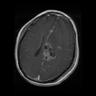

image 1   label = 0


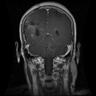

image 2   label = 0


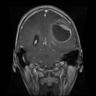

In [8]:
for i in range(3):
    img, label = test_dataset[i]
    print(f"image {i}   label = {label}")
    display(img)

### Testing Accuracy

In [9]:
test_embedding = simclr.get_embedding(test_dataset)

print("test_embedding.dtype:", test_embedding.dtype)
print("test_embedding.shape:", test_embedding.shape)

test_labels_tensor = torch.tensor([label for _, label in test_dataset])
test_embedding_tensor = torch.tensor(test_embedding)
acc = max(KNN(test_embedding_tensor, test_labels_tensor, batch_size=16))
print("Accuracy: %.5f" % acc)


test_embedding.dtype: float32
test_embedding.shape: (500, 512)
Accuracy: 0.95000


| Epoch | Batch Size | Accuracy |
| ----- | ---------- | -------- |
| 100   | 16         | 0.948/0.932    |
| 100   | 32         | 0.930/0.930    |
| 200   | 16         | 0.932/0.946    |
| 200   | 32         | 0.944/0.940    |
| 300   | 16         | 0.936/0.932    |
| 300   | 32         | 0.944/0.950    |
| 400   | 16         | 0.942/0.946    |
| 400   | 32         | 0.936/0.938    |




### Create result embedding

In [10]:
result_dataset = UnlabeledDataset(root="../data/unlabeled")
result_embeddeing = simclr.get_embedding(result_dataset)

print("result_embeddeing.dtype", result_embeddeing.dtype)
print("result_embeddeing.shape", result_embeddeing.shape)

np.save("../0710764.npy", result_embeddeing)


result_embeddeing.dtype float32
result_embeddeing.shape (7294, 512)


### Test embedding format

In [11]:
embedding = np.load("../0710764.npy")
print("embeddeing.dtype", embedding.dtype)
print("embeddeing.shape", embedding.shape)

embeddeing.dtype float32
embeddeing.shape (7294, 512)
